<h1>Delegate</h1> 

What is a Delegate? <br>
Delegate is a pointer to a method with a specific signature.

Why use Delegates? <br>
Delegates help us call methods that are already defined. In this way, delegates allow us to make extensible, flexible and <strong>loosely coupled</strong> applications. 

In [ ]:
public class Photo
{
    public static Photo Load(string path)
    {
        return new Photo();
    }
    public void Save()
    {
        
    }
}

In [ ]:
public class PhotoFilters
{
    public void ApplyBrightness(Photo photo)
    {
        Console.WriteLine("Applied Brightness");
    }

      public void ApplyContrast(Photo photo)
    {
        Console.WriteLine("Applied Contrast");
    }

      public void Resize(Photo photo)
    {
        Console.WriteLine("Resized");
    }
}

In [ ]:
public class PhotoProcessor
{
    public void Process(string path)
    {
        var photo = Photo.Load(path);

        var filters = new PhotoFilters();
        filters.ApplyBrightness(photo);
        filters.ApplyContrast(photo);
        filters.Resize(photo);

        photo.Save(); 
    }
}

The client who calls the above PhotoProcessor Code is defined below

In [ ]:
// Deriver Code like the one found in Program Class .i.e Main method
var processor = new PhotoProcessor();
processor.Process("Some path");
 

The issue with PhotoProcessor class is that we can not call further filters added later on. The only way to call more filters inside the Process method is to write the code and recompile it. <br>
<br>
We have a better way that allows us to add more filters to Process method without recompiling the class library that contains the PhotoProcessor class.

If the Code below is existing in a class library, it will never have to be compiled.

In [ ]:
public class PhotoProcessor
{
    public delegate void PhotoFilterHandler(Photo photo);
    public void Process(string path, PhotoFilterHandler photoFilters)
    {
        var photo = Photo.Load(path);
        photoFilters(photo);
        photo.Save();
    }
}

In [ ]:
var processor = new PhotoProcessor();

var filters = new PhotoFilters();
PhotoProcessor.PhotoFilterHandler filterHandler = filters.ApplyBrightness;
// filterHandler += filters.ApplyContrast;
// filterHandler += filters.Resize;

processor.Process("some Path", filterHandler);

We can creata our own filters and add them to the public delegate inside the PhotoProcessor

In [ ]:
public void RemoveSpots(Photo photo)
{
    Console.WriteLine("Removed Spots from Photo");
}

In [ ]:
filterHandler += RemoveSpots;

processor.Process("Some path",filterHandler);

The <strong>order in which the methods are added to a delegate is followed in the execution </strong>as well, as you might have noticed in the result of cell, above.

<h1>Under the Hood</h1>

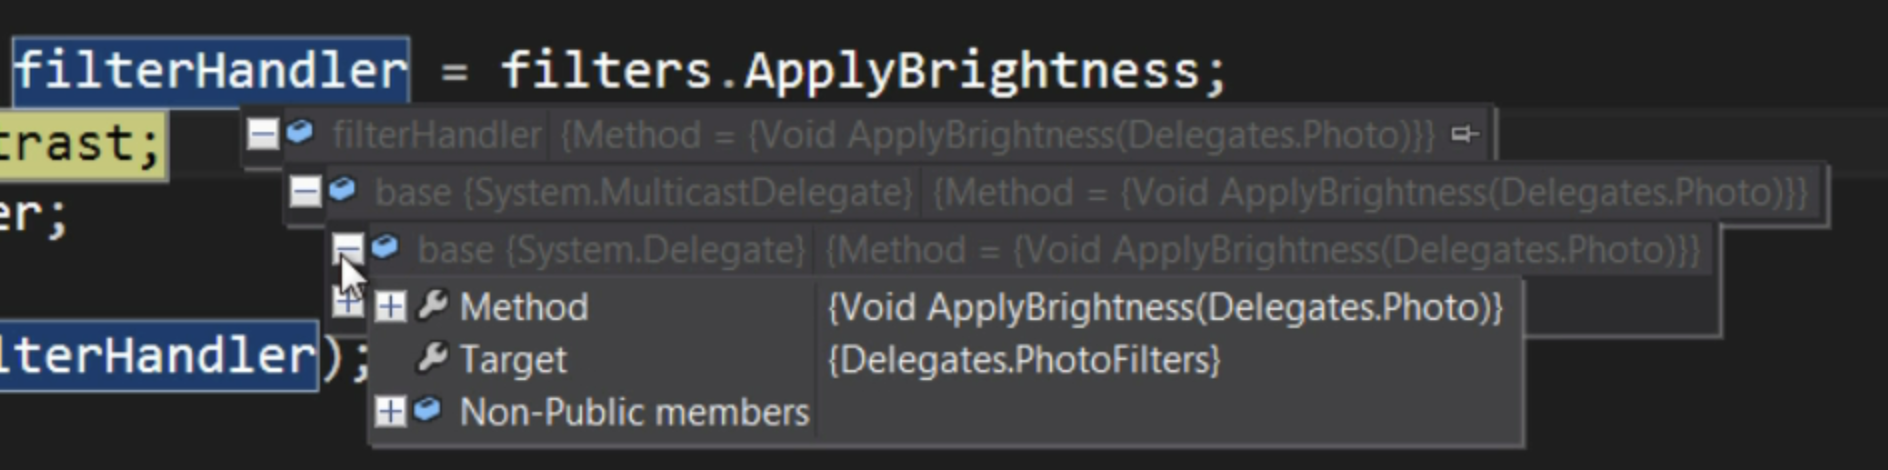

MultiCast delegates provide pointers to many functions <br>
All the functions being pointed at can be looked up in the InvocationList property inside Base Class System.Delegate


Moreover, you dont need to create delegates on your own. .Net has already two default delegates which we can use to carry out our tasks of delegating function calls. <br>

One is Action<> and the other one is Func<>

Lets implement the PhotoProcessor Class using one of these two already existing delegates.

In [ ]:
public class PhotoProcessor
{
    public void Process(string path, Action<Photo> photoFilters)
    {
        var photo = Photo.Load(path);
        photoFilters(photo);
        photo.Save();
    }
}

In [ ]:
var processor = new PhotoProcessor();
var filers = new PhotoFilters();
Action<Photo> filterHandler = filters.ApplyBrightness;
processor.Process("Some Path",filterHandler);

What we have done here can also be accomplished using Interfaces. So how do we decide when to use delegate rather than interfaces?


use delegate when <br>
* An eventing design pattern is used. <br>
* The caller does not need to access other properties or methods on the object implementing the method.

In [ ]:
// Explaining the second bullet point above.

public class PhotoFilters // Object implementing the methods
{
    public int imageSize {get;set;} = 10;

    public void ApplyBrightness(Photo photo)
    {
        Console.WriteLine("Applied Brightness");
    }

    public void ApplyContrast(Photo photo)
    {
        Console.WriteLine("Applied Contrast");
    }

    public void Resize(Photo photo)
    {
        Console.WriteLine("Resized");
    }
}

In [ ]:
// The caller code 

var filters = new PhotoFilters();

Action<Photo> filerHandler = filters.ApplyBrightness;
// filterHandler += filters.imageSize; // Error

var processor = new PhotoProcessor();
processor.Process("Path", filterHandler); 


Imagine if PhotoProcessor class needed to access the property, imageSize, then delegate would not have been an ideal solution. Instead an interface should have been created which could be  implemented by PhotoProcessor class.